In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import scipy
from scipy.stats.stats import pearsonr
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from numpy import nan
from numpy import isnan
import statsmodels.api as sm

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from numpy import nan
from numpy import isnan
import statsmodels.api as sm

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

#1) Iris Dataset

In [ ]:
!pip install split-folders
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:

!gdown --id 1a_fWFbUDaQ9kmYxciAFlKmVO5CwG71SZ
#For zip Dataset Folders
!unzip /content/IrisImageDataset.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1a_fWFbUDaQ9kmYxciAFlKmVO5CwG71SZ
To: /content/IrisImageDataset.zip
100% 157k/157k [00:00<00:00, 95.8MB/s]
Archive:  /content/IrisImageDataset.zip
   creating: content/IrisImageDataset/
   creating: content/IrisImageDataset/2/
  inflating: content/IrisImageDataset/2/118.png  
  inflating: content/IrisImageDataset/2/104.png  
  inflating: content/IrisImageDataset/2/133.png  
  inflating: content/IrisImageDataset/2/127.png  
  inflating: content/IrisImageDataset/2/131.png  
  inflating: content/IrisImageDataset/2/100.png  
  inflating: content/IrisImageDataset/2/139.png  
  inflating: content/IrisImageDataset/2/113.png  
  inflating: content/IrisImageDataset/2/111.png  
  inflating: content/IrisImageDataset/2/137.png

In [ ]:
import splitfolders  # or import split_folders
splitfolders.ratio("/content/content/IrisImageDataset", output="/content/content/IrisSplit", seed=1337, ratio=(.90,  .10), group_prefix=None) # default values

Copying files: 150 files [00:00, 6134.30 files/s]


In [ ]:

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [ ]:
os.listdir("/content/content/IrisSplit")

['train', 'val']

##DataLoaders

In [ ]:
# Data augmentation and normalization for training
# Just normalization/content/content/HeartDiseasesdataset for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/content/IrisSplit'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
dataset_sizes, class_names, device

({'train': 135, 'val': 15}, ['0', '1', '2'], device(type='cuda', index=0))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


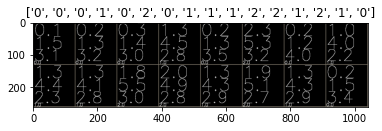

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_openml

In [ ]:
def train_simple_network_with_input_reshape(model, loss_func, train_loader, val_loader=None, score_funcs=None, 
                                            epochs=25, device="cpu", checkpoint_file=None):
    """Train simple neural networks
    
    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs. 
    val_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training
    
    Here used the method provided in lecture only added code to flatten the inputs before passing to linear model
    """
    to_track = ["epoch", "total time", "train loss"]
    if val_loader is not None:
        to_track.append("val loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if val_loader is not None:
            to_track.append("val " + eval_score )
        
    total_train_time = 0 #How long have we spent in the training loop? 
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []
    
    #SGD is Stochastic Gradient Decent.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0
        
        y_true = []
        y_pred = []

        start = time.time()
        for inputs, labels in tqdm(train_loader, desc="Train Batch", leave=False):
      
            #Move the batch to the device we are using. 
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            batch_size = inputs.shape[0]

            # PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            #flatten the input to fit in linear model
            y_hat = model(inputs) #this just computed f_Θ(x(i))#pass in a flattened view of inputs

            # Compute loss.
            loss = loss_func(y_hat, labels)

            loss.backward()# ∇_Θ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# Θ_{k+1} = Θ_k − η * ∇_Θ ℓ(y_hat, y)

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item() * inputs.size(0)
            
            #moving labels & predictions back to CPU for computing / storing predictions
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            for i in range(batch_size):
                y_true.append(labels[i])
                y_pred.append(y_hat[i,:])
        #end training epoch
        end = time.time()
        total_train_time += (end-start)
        
        results["epoch"].append( epoch )
        results["total time"].append( total_train_time )
        results["train loss"].append( running_loss )
        
        y_pred = np.asarray(y_pred)
        
        if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
            y_pred = np.argmax(y_pred, axis=1)
            
        for name, score_func in score_funcs.items():
            results["train " + name].append( score_func(y_true, y_pred) )
      
        if val_loader is None:
            pass
        else:#Lets find out validation performance as we go!
            model = model.eval() #Set the model to "evaluation" mode, b/c we don't want to make any updates!

            y_true = []
            y_pred = []
            
            running_loss = 0.0

            for inputs, labels in val_loader:
        
                #Move the batch to the device we are using. 
                inputs = inputs.to(device)
                labels = labels.to(device)

                #flatten the input to fit in linear model
                y_hat = model(inputs) #pass in a flattened view of inputs
            
                loss = loss_func(y_hat, labels)
                
                #Now we are just grabbing some information we would like to have
                running_loss += loss.item() * inputs.size(0)

                #moving labels & predictions back to CPU for computing / storing predictions
                labels = labels.detach().cpu().numpy()
                y_hat = y_hat.detach().cpu().numpy()
                for i in range(batch_size):
                    y_true.append(labels[i])
                    y_pred.append(y_hat[i,:])
                        
            results["val loss"].append( running_loss )

            y_pred = np.asarray(y_pred)

            if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
                y_pred = np.argmax(y_pred, axis=1)

            for name, score_func in score_funcs.items():
                results["val " + name].append( score_func(y_true, y_pred) )
                
        if checkpoint_file is not None:
            torch.save({
                'epoch': epoch,
                'c': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'results' : results
                }, checkpoint_file)

    return pd.DataFrame.from_dict(results)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    res_dict = {}
    epoch_loss_list = []
    epoch_acc_list = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            epoch_loss_list.append(epoch_loss)
            epoch_acc_list.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            res_dict[phase] = epoch_acc_list
            


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_loss_list, epoch_acc_list,res_dict

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

##Training, Testing and Evaluation

###Resnet-18

In [ ]:
#Resnet Function with parameters as input


model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0005)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.4154 Acc: 0.8444
val Loss: 0.4251 Acc: 0.8667

Epoch 1/9
----------
train Loss: 0.1577 Acc: 0.9481
val Loss: 0.3310 Acc: 0.8667

Epoch 2/9
----------
train Loss: 0.1269 Acc: 0.9630
val Loss: 0.2370 Acc: 0.9333

Epoch 3/9
----------
train Loss: 0.0615 Acc: 0.9852
val Loss: 0.2343 Acc: 0.9333

Epoch 4/9
----------
train Loss: 0.0378 Acc: 0.9852
val Loss: 0.1431 Acc: 0.9333

Epoch 5/9
----------
train Loss: 0.0160 Acc: 0.9926
val Loss: 0.1103 Acc: 0.9333

Epoch 6/9
----------
train Loss: 0.0238 Acc: 0.9852
val Loss: 0.0937 Acc: 0.9333

Epoch 7/9
----------
train Loss: 0.0201 Acc: 0.9926
val Loss: 0.0882 Acc: 0.9333

Epoch 8/9
----------
train Loss: 0.0186 Acc: 1.0000
val Loss: 0.0757 Acc: 0.9333

Epoch 9/9
----------
train Loss: 0.0138 Acc: 1.0000
val Loss: 0.0698 Acc: 0.9333

Training complete in 0m 12s
Best val Acc: 0.933333


In [ ]:
torch.save(model_ft, "Iris_Resnet18.pth")
model_ft = torch.load("/content/Iris_Resnet18.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


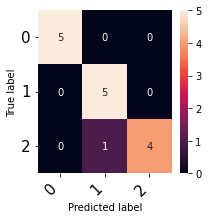

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

In [ ]:
def getConfusionMatrix(model, show_image=False):
    model.eval() #set the model to evaluation mode
    confusion_matrix=np.zeros((2,2),dtype=int) #initialize a confusion matrix
    num_images=dataloaders['val'] #size of the testset
    
    with torch.no_grad(): #disable back prop to test the model
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            #get predictions of the model
            outputs = model(inputs) 
            _, preds = torch.max(outputs, 1) 
            
            #get confusion matrix
            for j in range(inputs.size()[0]): 
                if preds[j]==1 and labels[j]==1:
                    term='TP'
                    confusion_matrix[0][0]+=1
                elif preds[j]==1 and labels[j]==0:
                    term='FP'
                    confusion_matrix[1][0]+=1
                elif preds[j]==0 and labels[j]==1:
                    term='FN'
                    confusion_matrix[0][1]+=1
                elif preds[j]==0 and labels[j]==0:
                    term='TN'
                    confusion_matrix[1][1]+=1
                #show image and its class in confusion matrix    
                if show_image:
                    print('predicted: {}'.format(class_names[preds[j]]))
                    print(term)
                    imshow(inputs.cpu().data[j])
                    print()
        #print results
        print('Confusion Matrix: ')
        print(confusion_matrix)
        print()
        print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
        print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
        print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
        print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))
        
        return confusion_matrix

###Densenet

In [ ]:
model_ft = models.densenet121(pretrained=False)
#num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adamax(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 3.1071 Acc: 0.7926
val Loss: 18.1377 Acc: 0.3333

Epoch 1/19
----------
train Loss: 0.1474 Acc: 0.9704
val Loss: 6.3226 Acc: 0.3333

Epoch 2/19
----------
train Loss: 0.0734 Acc: 0.9852
val Loss: 0.1776 Acc: 1.0000

Epoch 3/19
----------
train Loss: 0.0580 Acc: 0.9852
val Loss: 0.0322 Acc: 1.0000

Epoch 4/19
----------
train Loss: 0.0461 Acc: 0.9778
val Loss: 0.0312 Acc: 1.0000

Epoch 5/19
----------
train Loss: 0.0319 Acc: 1.0000
val Loss: 0.0313 Acc: 1.0000

Epoch 6/19
----------
train Loss: 0.0302 Acc: 1.0000
val Loss: 0.0346 Acc: 1.0000

Epoch 7/19
----------
train Loss: 0.0444 Acc: 0.9926
val Loss: 0.0281 Acc: 1.0000

Epoch 8/19
----------
train Loss: 0.0429 Acc: 1.0000
val Loss: 0.0298 Acc: 1.0000

Epoch 9/19
----------
train Loss: 0.0427 Acc: 0.9926
val Loss: 0.0329 Acc: 1.0000

Epoch 10/19
----------
train Loss: 0.0212 Acc: 1.0000
val Loss: 0.0332 Acc: 1.0000

Epoch 11/19
----------
train Loss: 0.0185 Acc: 1.0000
val Loss: 0.0319 Acc: 1.0000

Epoch 12/19
----------


In [ ]:
torch.save(model_ft, "Iris_Densenet.pth")
model_ft = torch.load("/content/Iris_Densenet.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


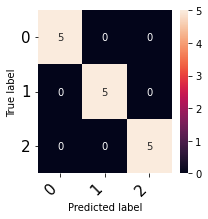

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

In [ ]:
def getConfusionMatrix(model, show_image=False):
    model.eval() #set the model to evaluation mode
    confusion_matrix=np.zeros((2,2),dtype=int) #initialize a confusion matrix
    num_images=dataloaders['val'] #size of the testset
    
    with torch.no_grad(): #disable back prop to test the model
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            #get predictions of the model
            outputs = model(inputs) 
            _, preds = torch.max(outputs, 1) 
            
            #get confusion matrix
            for j in range(inputs.size()[0]): 
                if preds[j]==1 and labels[j]==1:
                    term='TP'
                    confusion_matrix[0][0]+=1
                elif preds[j]==1 and labels[j]==0:
                    term='FP'
                    confusion_matrix[1][0]+=1
                elif preds[j]==0 and labels[j]==1:
                    term='FN'
                    confusion_matrix[0][1]+=1
                elif preds[j]==0 and labels[j]==0:
                    term='TN'
                    confusion_matrix[1][1]+=1
                #show image and its class in confusion matrix    
                if show_image:
                    print('predicted: {}'.format(class_names[preds[j]]))
                    print(term)
                    imshow(inputs.cpu().data[j])
                    print()
        #print results
        print('Confusion Matrix: ')
        print(confusion_matrix)
        print()
        print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
        print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
        print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
        print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))
        
        return confusion_matrix

###Inception V1

In [ ]:
model_ft = models.googlenet(pretrained=False)
model_ft.aux_logits = False 
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/googlenet.py:50: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  FutureWarning,


In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


train Loss: 0.7826 Acc: 0.6889
val Loss: 1.5407 Acc: 0.3333

Epoch 1/19
----------
train Loss: 0.2734 Acc: 0.9111
val Loss: 3.0043 Acc: 0.3333

Epoch 2/19
----------
train Loss: 0.2350 Acc: 0.9259
val Loss: 3.0090 Acc: 0.3333

Epoch 3/19
----------
train Loss: 0.2378 Acc: 0.9407
val Loss: 3.2603 Acc: 0.3333

Epoch 4/19
----------
train Loss: 0.2621 Acc: 0.9185
val Loss: 2.6407 Acc: 0.2000

Epoch 5/19
----------
train Loss: 0.1313 Acc: 0.9556
val Loss: 0.3249 Acc: 0.8667

Epoch 6/19
----------
train Loss: 0.1291 Acc: 0.9556
val Loss: 0.1274 Acc: 0.9333

Epoch 7/19
----------
train Loss: 0.1430 Acc: 0.9556
val Loss: 0.0660 Acc: 1.0000

Epoch 8/19
----------
train Loss: 0.0976 Acc: 0.9704
val Loss: 0.0645 Acc: 1.0000

Epoch 9/19
----------
train Loss: 0.0992 Acc: 0.9630
val Loss: 0.0474 Acc: 1.0000

Epoch 10/19
----------
train Loss: 0.0800 Acc: 0.9778
val Loss: 0.0526 Acc: 1.0000

Epoch 11/19
----------
train Loss: 0.1057 Acc: 0.9556
val Loss: 0.0452 Acc: 1.0000

Epoch 12/19
----------
t

In [ ]:
torch.save(model_ft, "Iris_Inception.pth")
model_ft = torch.load("/content/Iris_Inception.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


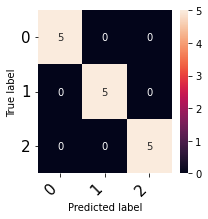

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

# 2) Wine Dataset

In [ ]:
!gdown --id 1Nk1ymYTjBzKvyvbTOqUUelJBq9UG4MG7
#For zip Dataset Folders
!unzip /content/WineImageDataset.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Nk1ymYTjBzKvyvbTOqUUelJBq9UG4MG7
To: /content/WineImageDataset.zip
100% 281k/281k [00:00<00:00, 119MB/s]
Archive:  /content/WineImageDataset.zip
   creating: content/WineImageDataset/
   creating: content/WineImageDataset/2/
 extracting: content/WineImageDataset/2/118.png  
 extracting: content/WineImageDataset/2/60.png  
 extracting: content/WineImageDataset/2/104.png  
 extracting: content/WineImageDataset/2/63.png  
 extracting: content/WineImageDataset/2/127.png  
 extracting: content/WineImageDataset/2/61.png  
 extracting: content/WineImageDataset/2/100.png  
 extracting: content/WineImageDataset/2/113.png  
 extracting: content/WineImageDataset/2/111.png  
 extracting: content/WineImageDataset/2/109.png  
 

In [ ]:

import splitfolders  # or import split_folders
splitfolders.ratio("/content/content/WineImageDataset", output="/content/content/WineSplit",  seed=1337, ratio=(.85,  .15), group_prefix=None) # default values

Copying files: 178 files [00:00, 8227.12 files/s]


In [ ]:
os.listdir("/content/content/WineSplit")

['train', 'val']

##DataLoaders

In [ ]:
# Data augmentation and normalization for training
# Just normalization/content/content/HeartDiseasesdataset for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/content/WineSplit'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
dataset_sizes, class_names, device

({'train': 150, 'val': 28}, ['1', '2', '3'], device(type='cuda', index=0))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


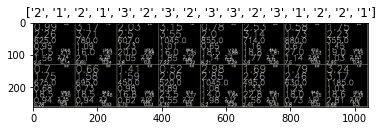

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_openml

In [ ]:
def train_simple_network_with_input_reshape(model, loss_func, train_loader, val_loader=None, score_funcs=None, 
                                            epochs=25, device="cpu", checkpoint_file=None):
    """Train simple neural networks
    
    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs. 
    val_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training
    
    Here used the method provided in lecture only added code to flatten the inputs before passing to linear model
    """
    to_track = ["epoch", "total time", "train loss"]
    if val_loader is not None:
        to_track.append("val loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if val_loader is not None:
            to_track.append("val " + eval_score )
        
    total_train_time = 0 #How long have we spent in the training loop? 
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []
    
    #SGD is Stochastic Gradient Decent.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0
        
        y_true = []
        y_pred = []

        start = time.time()
        for inputs, labels in tqdm(train_loader, desc="Train Batch", leave=False):
      
            #Move the batch to the device we are using. 
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            batch_size = inputs.shape[0]

            # PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            #flatten the input to fit in linear model
            y_hat = model(inputs) #this just computed f_Θ(x(i))#pass in a flattened view of inputs

            # Compute loss.
            loss = loss_func(y_hat, labels)

            loss.backward()# ∇_Θ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# Θ_{k+1} = Θ_k − η * ∇_Θ ℓ(y_hat, y)

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item() * inputs.size(0)
            
            #moving labels & predictions back to CPU for computing / storing predictions
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            for i in range(batch_size):
                y_true.append(labels[i])
                y_pred.append(y_hat[i,:])
        #end training epoch
        end = time.time()
        total_train_time += (end-start)
        
        results["epoch"].append( epoch )
        results["total time"].append( total_train_time )
        results["train loss"].append( running_loss )
        
        y_pred = np.asarray(y_pred)
        
        if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
            y_pred = np.argmax(y_pred, axis=1)
            
        for name, score_func in score_funcs.items():
            results["train " + name].append( score_func(y_true, y_pred) )
      
        if val_loader is None:
            pass
        else:#Lets find out validation performance as we go!
            model = model.eval() #Set the model to "evaluation" mode, b/c we don't want to make any updates!

            y_true = []
            y_pred = []
            
            running_loss = 0.0

            for inputs, labels in val_loader:
        
                #Move the batch to the device we are using. 
                inputs = inputs.to(device)
                labels = labels.to(device)

                #flatten the input to fit in linear model
                y_hat = model(inputs) #pass in a flattened view of inputs
            
                loss = loss_func(y_hat, labels)
                
                #Now we are just grabbing some information we would like to have
                running_loss += loss.item() * inputs.size(0)

                #moving labels & predictions back to CPU for computing / storing predictions
                labels = labels.detach().cpu().numpy()
                y_hat = y_hat.detach().cpu().numpy()
                for i in range(batch_size):
                    y_true.append(labels[i])
                    y_pred.append(y_hat[i,:])
                        
            results["val loss"].append( running_loss )

            y_pred = np.asarray(y_pred)

            if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
                y_pred = np.argmax(y_pred, axis=1)

            for name, score_func in score_funcs.items():
                results["val " + name].append( score_func(y_true, y_pred) )
                
        if checkpoint_file is not None:
            torch.save({
                'epoch': epoch,
                'c': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'results' : results
                }, checkpoint_file)

    return pd.DataFrame.from_dict(results)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    res_dict = {}
    epoch_loss_list = []
    epoch_acc_list = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            epoch_loss_list.append(epoch_loss)
            epoch_acc_list.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            res_dict[phase] = epoch_acc_list
            


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_loss_list, epoch_acc_list,res_dict

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

##Training, Testing and Evaluation

###Resnet-18

In [ ]:
#Resnet Function with parameters as input


model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0005)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.4448 Acc: 0.8067
val Loss: 0.1322 Acc: 0.9643

Epoch 1/9
----------
train Loss: 0.0333 Acc: 0.9800
val Loss: 0.0072 Acc: 1.0000

Epoch 2/9
----------
train Loss: 0.0052 Acc: 1.0000
val Loss: 0.0022 Acc: 1.0000

Epoch 3/9
----------
train Loss: 0.0032 Acc: 1.0000
val Loss: 0.0021 Acc: 1.0000

Epoch 4/9
----------
train Loss: 0.0039 Acc: 1.0000
val Loss: 0.0019 Acc: 1.0000

Epoch 5/9
----------
train Loss: 0.0030 Acc: 1.0000
val Loss: 0.0019 Acc: 1.0000

Epoch 6/9
----------
train Loss: 0.0033 Acc: 1.0000
val Loss: 0.0019 Acc: 1.0000

Epoch 7/9
----------
train Loss: 0.0044 Acc: 1.0000
val Loss: 0.0022 Acc: 1.0000

Epoch 8/9
----------
train Loss: 0.0137 Acc: 1.0000
val Loss: 0.0016 Acc: 1.0000

Epoch 9/9
----------
train Loss: 0.0074 Acc: 1.0000
val Loss: 0.0021 Acc: 1.0000

Training complete in 0m 10s
Best val Acc: 1.000000


In [ ]:
torch.save(model_ft, "Wine_Resnet18.pth")
model_ft = torch.load("/content/Wine_Resnet18.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


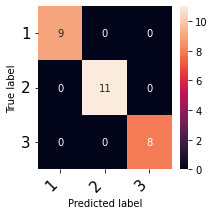

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

###Densenet

In [ ]:
model_ft = models.densenet121(pretrained=False)
#num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adamax(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 3.5057 Acc: 0.6267
val Loss: 4.6634 Acc: 0.2857

Epoch 1/4
----------
train Loss: 0.2085 Acc: 0.9800
val Loss: 1.3584 Acc: 0.3214

Epoch 2/4
----------
train Loss: 0.0367 Acc: 1.0000
val Loss: 0.0290 Acc: 1.0000

Epoch 3/4
----------
train Loss: 0.0249 Acc: 1.0000
val Loss: 0.0203 Acc: 1.0000

Epoch 4/4
----------
train Loss: 0.0145 Acc: 1.0000
val Loss: 0.0208 Acc: 1.0000

Training complete in 0m 10s
Best val Acc: 1.000000


In [ ]:
torch.save(model_ft, "Wine_Densenet.pth")
model_ft = torch.load("/content/Wine_Densenet.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


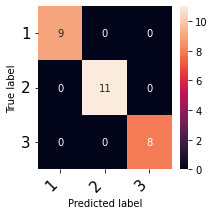

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

###Inception V1

In [ ]:
model_ft = models.googlenet(pretrained=False)
model_ft.aux_logits = False 
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/googlenet.py:50: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  FutureWarning,


In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


train Loss: 1.0465 Acc: 0.5333
val Loss: 1.2584 Acc: 0.3214

Epoch 1/19
----------
train Loss: 0.5897 Acc: 0.7600
val Loss: 4.6287 Acc: 0.3214

Epoch 2/19
----------
train Loss: 0.2254 Acc: 0.9267
val Loss: 5.5582 Acc: 0.3214

Epoch 3/19
----------
train Loss: 0.1626 Acc: 0.9267
val Loss: 3.9080 Acc: 0.3214

Epoch 4/19
----------
train Loss: 0.0897 Acc: 0.9667
val Loss: 1.3947 Acc: 0.4286

Epoch 5/19
----------
train Loss: 0.0513 Acc: 0.9800
val Loss: 0.1521 Acc: 0.9286

Epoch 6/19
----------
train Loss: 0.0237 Acc: 0.9933
val Loss: 0.0433 Acc: 1.0000

Epoch 7/19
----------
train Loss: 0.0496 Acc: 0.9933
val Loss: 0.0162 Acc: 1.0000

Epoch 8/19
----------
train Loss: 0.0168 Acc: 1.0000
val Loss: 0.0115 Acc: 1.0000

Epoch 9/19
----------
train Loss: 0.0219 Acc: 0.9933
val Loss: 0.0124 Acc: 1.0000

Epoch 10/19
----------
train Loss: 0.0085 Acc: 1.0000
val Loss: 0.0097 Acc: 1.0000

Epoch 11/19
----------
train Loss: 0.0160 Acc: 1.0000
val Loss: 0.0101 Acc: 1.0000

Epoch 12/19
----------
t

In [ ]:
torch.save(model_ft, "Wine_Inception.pth")
model_ft = torch.load("/content/Wine_Inception.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


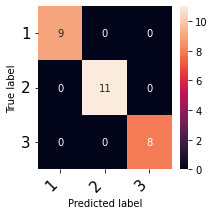

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

# 3) Breast Cancer

In [ ]:
!gdown --id 1-QHXj_3al84vRUM3lQW5lvZbCC8854XT
#For zip Dataset Folders
!unzip /content/BreastCancerImageDataset.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-QHXj_3al84vRUM3lQW5lvZbCC8854XT
To: /content/BreastCancerImageDataset.zip
100% 645k/645k [00:00<00:00, 83.5MB/s]
Archive:  /content/BreastCancerImageDataset.zip
   creating: content/BreastCancerImageDataset/
   creating: content/BreastCancerImageDataset/2/
 extracting: content/BreastCancerImageDataset/2/158.png  
 extracting: content/BreastCancerImageDataset/2/118.png  
 extracting: content/BreastCancerImageDataset/2/245.png  
  inflating: content/BreastCancerImageDataset/2/686.png  
 extracting: content/BreastCancerImageDataset/2/133.png  
 extracting: content/BreastCancerImageDataset/2/35.png  
 extracting: content/BreastCancerImageDataset/2/388.png  
 extracting: content/BreastCancerImageDataset/2/303.png  
 e

In [ ]:
import splitfolders  # or import split_folders
splitfolders.ratio("/content/content/BreastCancerImageDataset", output="/content/content/BreastCancerSplit", seed=1337, ratio=(.80,  .20), group_prefix=None) # default values

Copying files: 699 files [00:00, 8476.80 files/s]


In [ ]:
os.listdir("/content/content/BreastCancerSplit")

['train', 'val']

##DataLoaders

In [ ]:
# Data augmentation and normalization for training
# Just normalization/content/content/HeartDiseasesdataset for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/content/BreastCancerSplit'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
dataset_sizes, class_names, device

({'train': 558, 'val': 141}, ['2', '4'], device(type='cuda', index=0))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


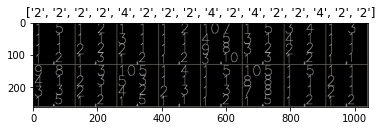

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_openml

In [ ]:
def train_simple_network_with_input_reshape(model, loss_func, train_loader, val_loader=None, score_funcs=None, 
                                            epochs=25, device="cpu", checkpoint_file=None):
    """Train simple neural networks
    
    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs. 
    val_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training
    
    Here used the method provided in lecture only added code to flatten the inputs before passing to linear model
    """
    to_track = ["epoch", "total time", "train loss"]
    if val_loader is not None:
        to_track.append("val loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if val_loader is not None:
            to_track.append("val " + eval_score )
        
    total_train_time = 0 #How long have we spent in the training loop? 
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []
    
    #SGD is Stochastic Gradient Decent.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0
        
        y_true = []
        y_pred = []

        start = time.time()
        for inputs, labels in tqdm(train_loader, desc="Train Batch", leave=False):
      
            #Move the batch to the device we are using. 
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            batch_size = inputs.shape[0]

            # PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            #flatten the input to fit in linear model
            y_hat = model(inputs) #this just computed f_Θ(x(i))#pass in a flattened view of inputs

            # Compute loss.
            loss = loss_func(y_hat, labels)

            loss.backward()# ∇_Θ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# Θ_{k+1} = Θ_k − η * ∇_Θ ℓ(y_hat, y)

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item() * inputs.size(0)
            
            #moving labels & predictions back to CPU for computing / storing predictions
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            for i in range(batch_size):
                y_true.append(labels[i])
                y_pred.append(y_hat[i,:])
        #end training epoch
        end = time.time()
        total_train_time += (end-start)
        
        results["epoch"].append( epoch )
        results["total time"].append( total_train_time )
        results["train loss"].append( running_loss )
        
        y_pred = np.asarray(y_pred)
        
        if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
            y_pred = np.argmax(y_pred, axis=1)
            
        for name, score_func in score_funcs.items():
            results["train " + name].append( score_func(y_true, y_pred) )
      
        if val_loader is None:
            pass
        else:#Lets find out validation performance as we go!
            model = model.eval() #Set the model to "evaluation" mode, b/c we don't want to make any updates!

            y_true = []
            y_pred = []
            
            running_loss = 0.0

            for inputs, labels in val_loader:
        
                #Move the batch to the device we are using. 
                inputs = inputs.to(device)
                labels = labels.to(device)

                #flatten the input to fit in linear model
                y_hat = model(inputs) #pass in a flattened view of inputs
            
                loss = loss_func(y_hat, labels)
                
                #Now we are just grabbing some information we would like to have
                running_loss += loss.item() * inputs.size(0)

                #moving labels & predictions back to CPU for computing / storing predictions
                labels = labels.detach().cpu().numpy()
                y_hat = y_hat.detach().cpu().numpy()
                for i in range(batch_size):
                    y_true.append(labels[i])
                    y_pred.append(y_hat[i,:])
                        
            results["val loss"].append( running_loss )

            y_pred = np.asarray(y_pred)

            if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
                y_pred = np.argmax(y_pred, axis=1)

            for name, score_func in score_funcs.items():
                results["val " + name].append( score_func(y_true, y_pred) )
                
        if checkpoint_file is not None:
            torch.save({
                'epoch': epoch,
                'c': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'results' : results
                }, checkpoint_file)

    return pd.DataFrame.from_dict(results)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    res_dict = {}
    epoch_loss_list = []
    epoch_acc_list = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            epoch_loss_list.append(epoch_loss)
            epoch_acc_list.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            res_dict[phase] = epoch_acc_list
            


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_loss_list, epoch_acc_list,res_dict

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

##Training, Testing and Evaluation

###Resnet-18

In [ ]:
#Resnet Function with parameters as input


model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adamax(model_ft.parameters(), lr=0.0005)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.1965 Acc: 0.9319
val Loss: 0.0470 Acc: 0.9858

Epoch 1/19
----------
train Loss: 0.0708 Acc: 0.9803
val Loss: 0.0567 Acc: 0.9858

Epoch 2/19
----------
train Loss: 0.0169 Acc: 0.9964
val Loss: 0.0585 Acc: 0.9858

Epoch 3/19
----------
train Loss: 0.0083 Acc: 1.0000
val Loss: 0.0614 Acc: 0.9858

Epoch 4/19
----------
train Loss: 0.0101 Acc: 0.9964
val Loss: 0.0586 Acc: 0.9858

Epoch 5/19
----------
train Loss: 0.0097 Acc: 0.9964
val Loss: 0.0615 Acc: 0.9858

Epoch 6/19
----------
train Loss: 0.0048 Acc: 0.9982
val Loss: 0.0612 Acc: 0.9858

Epoch 7/19
----------
train Loss: 0.0029 Acc: 1.0000
val Loss: 0.0678 Acc: 0.9858

Epoch 8/19
----------
train Loss: 0.0038 Acc: 1.0000
val Loss: 0.0677 Acc: 0.9858

Epoch 9/19
----------
train Loss: 0.0063 Acc: 0.9982
val Loss: 0.0656 Acc: 0.9858

Epoch 10/19
----------
train Loss: 0.0035 Acc: 1.0000
val Loss: 0.0616 Acc: 0.9858

Epoch 11/19
----------
train Loss: 0.0037 Acc: 1.0000
val Loss: 0.0628 Acc: 0.9858

Epoch 12/19
----------
t

In [ ]:
torch.save(model_ft, "BreastCancer_Resnet18.pth")
model_ft = torch.load("/content/BreastCancer_Resnet18.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(98.9130)
Specificity:  tensor(97.9592)
PPV:  tensor(98.9130)
NPV:  tensor(97.9592)


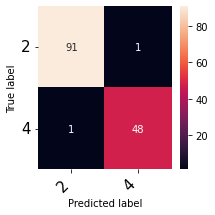

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

###Densenet

In [ ]:
model_ft = models.densenet121(pretrained=False)
#num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adamax(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.8441 Acc: 0.9247
val Loss: 0.1801 Acc: 0.9716

Epoch 1/19
----------
train Loss: 0.1227 Acc: 0.9624
val Loss: 0.0332 Acc: 0.9858

Epoch 2/19
----------
train Loss: 0.0461 Acc: 0.9839
val Loss: 0.0096 Acc: 1.0000

Epoch 3/19
----------
train Loss: 0.0093 Acc: 1.0000
val Loss: 0.0066 Acc: 1.0000

Epoch 4/19
----------
train Loss: 0.0080 Acc: 1.0000
val Loss: 0.0061 Acc: 1.0000

Epoch 5/19
----------
train Loss: 0.0084 Acc: 1.0000
val Loss: 0.0058 Acc: 1.0000

Epoch 6/19
----------
train Loss: 0.0086 Acc: 1.0000
val Loss: 0.0055 Acc: 1.0000

Epoch 7/19
----------
train Loss: 0.0396 Acc: 0.9982
val Loss: 0.0059 Acc: 1.0000

Epoch 8/19
----------
train Loss: 0.0060 Acc: 1.0000
val Loss: 0.0059 Acc: 1.0000

Epoch 9/19
----------
train Loss: 0.0087 Acc: 1.0000
val Loss: 0.0052 Acc: 1.0000

Epoch 10/19
----------
train Loss: 0.0068 Acc: 1.0000
val Loss: 0.0060 Acc: 1.0000

Epoch 11/19
----------
train Loss: 0.0090 Acc: 1.0000
val Loss: 0.0055 Acc: 1.0000

Epoch 12/19
----------
t

In [ ]:
torch.save(model_ft, "BreastCancer_Densenet.pth")
model_ft = torch.load("/content/BreastCancer_Densenet.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


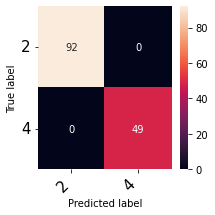

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

###Inception V1

In [ ]:
model_ft = models.googlenet(pretrained=False)
model_ft.aux_logits = False 
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/googlenet.py:50: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  FutureWarning,


In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


train Loss: 0.3302 Acc: 0.8943
val Loss: 0.7491 Acc: 0.3475

Epoch 1/19
----------
train Loss: 0.1590 Acc: 0.9391
val Loss: 0.1274 Acc: 0.9858

Epoch 2/19
----------
train Loss: 0.0558 Acc: 0.9875
val Loss: 0.0036 Acc: 1.0000

Epoch 3/19
----------
train Loss: 0.0050 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 4/19
----------
train Loss: 0.0017 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 5/19
----------
train Loss: 0.0009 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 6/19
----------
train Loss: 0.0017 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 7/19
----------
train Loss: 0.0013 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 8/19
----------
train Loss: 0.0008 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 9/19
----------
train Loss: 0.0016 Acc: 1.0000
val Loss: 0.0003 Acc: 1.0000

Epoch 10/19
----------
train Loss: 0.0007 Acc: 1.0000
val Loss: 0.0003 Acc: 1.0000

Epoch 11/19
----------
train Loss: 0.0010 Acc: 1.0000
val Loss: 0.0002 Acc: 1.0000

Epoch 12/19
----------
t

In [ ]:
torch.save(model_ft, "BreastCancer_Inception.pth")
model_ft = torch.load("/content/BreastCancer_Inception.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


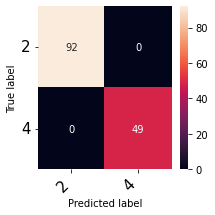

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

# 4) Cleveland

In [ ]:
!gdown --id 1o7KhzZmFwQYGeLOm-eFnP3TkdE7t6U31
#For zip Dataset Folders
!unzip /content/ClevelandImageDataset.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1o7KhzZmFwQYGeLOm-eFnP3TkdE7t6U31
To: /content/ClevelandImageDataset.zip
100% 460k/460k [00:00<00:00, 131MB/s]
Archive:  /content/ClevelandImageDataset.zip
   creating: content/ClevelandImageDataset/
   creating: content/ClevelandImageDataset/1/
 extracting: content/ClevelandImageDataset/1/158.png  
 extracting: content/ClevelandImageDataset/1/174.png  
 extracting: content/ClevelandImageDataset/1/245.png  
 extracting: content/ClevelandImageDataset/1/133.png  
 extracting: content/ClevelandImageDataset/1/35.png  
 extracting: content/ClevelandImageDataset/1/159.png  
 extracting: content/ClevelandImageDataset/1/279.png  
 extracting: content/ClevelandImageDataset/1/246.png  
 extracting: content/ClevelandImageData

In [ ]:
import splitfolders  # or import split_folders
splitfolders.ratio("/content/content/ClevelandImageDataset", output="/content/content/ClevelandSplit", seed=1337, ratio=(.85,  .15), group_prefix=None) # default values

Copying files: 297 files [00:00, 10098.48 files/s]


In [ ]:
os.listdir("/content/content/ClevelandSplit")

['train', 'val']

##DataLoaders

In [ ]:
# Data augmentation and normalization for training
# Just normalization/content/content/HeartDiseasesdataset for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/content/ClevelandSplit'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
dataset_sizes, class_names, device

({'train': 252, 'val': 45}, ['0', '1'], device(type='cuda', index=0))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


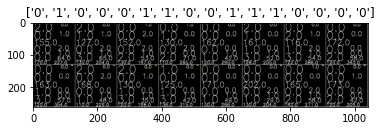

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_openml

In [ ]:
def train_simple_network_with_input_reshape(model, loss_func, train_loader, val_loader=None, score_funcs=None, 
                                            epochs=25, device="cpu", checkpoint_file=None):
    """Train simple neural networks
    
    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs. 
    val_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training
    
    Here used the method provided in lecture only added code to flatten the inputs before passing to linear model
    """
    to_track = ["epoch", "total time", "train loss"]
    if val_loader is not None:
        to_track.append("val loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if val_loader is not None:
            to_track.append("val " + eval_score )
        
    total_train_time = 0 #How long have we spent in the training loop? 
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []
    
    #SGD is Stochastic Gradient Decent.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0
        
        y_true = []
        y_pred = []

        start = time.time()
        for inputs, labels in tqdm(train_loader, desc="Train Batch", leave=False):
      
            #Move the batch to the device we are using. 
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            batch_size = inputs.shape[0]

            # PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            #flatten the input to fit in linear model
            y_hat = model(inputs) #this just computed f_Θ(x(i))#pass in a flattened view of inputs

            # Compute loss.
            loss = loss_func(y_hat, labels)

            loss.backward()# ∇_Θ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# Θ_{k+1} = Θ_k − η * ∇_Θ ℓ(y_hat, y)

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item() * inputs.size(0)
            
            #moving labels & predictions back to CPU for computing / storing predictions
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            for i in range(batch_size):
                y_true.append(labels[i])
                y_pred.append(y_hat[i,:])
        #end training epoch
        end = time.time()
        total_train_time += (end-start)
        
        results["epoch"].append( epoch )
        results["total time"].append( total_train_time )
        results["train loss"].append( running_loss )
        
        y_pred = np.asarray(y_pred)
        
        if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
            y_pred = np.argmax(y_pred, axis=1)
            
        for name, score_func in score_funcs.items():
            results["train " + name].append( score_func(y_true, y_pred) )
      
        if val_loader is None:
            pass
        else:#Lets find out validation performance as we go!
            model = model.eval() #Set the model to "evaluation" mode, b/c we don't want to make any updates!

            y_true = []
            y_pred = []
            
            running_loss = 0.0

            for inputs, labels in val_loader:
        
                #Move the batch to the device we are using. 
                inputs = inputs.to(device)
                labels = labels.to(device)

                #flatten the input to fit in linear model
                y_hat = model(inputs) #pass in a flattened view of inputs
            
                loss = loss_func(y_hat, labels)
                
                #Now we are just grabbing some information we would like to have
                running_loss += loss.item() * inputs.size(0)

                #moving labels & predictions back to CPU for computing / storing predictions
                labels = labels.detach().cpu().numpy()
                y_hat = y_hat.detach().cpu().numpy()
                for i in range(batch_size):
                    y_true.append(labels[i])
                    y_pred.append(y_hat[i,:])
                        
            results["val loss"].append( running_loss )

            y_pred = np.asarray(y_pred)

            if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
                y_pred = np.argmax(y_pred, axis=1)

            for name, score_func in score_funcs.items():
                results["val " + name].append( score_func(y_true, y_pred) )
                
        if checkpoint_file is not None:
            torch.save({
                'epoch': epoch,
                'c': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'results' : results
                }, checkpoint_file)

    return pd.DataFrame.from_dict(results)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    res_dict = {}
    epoch_loss_list = []
    epoch_acc_list = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            epoch_loss_list.append(epoch_loss)
            epoch_acc_list.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            res_dict[phase] = epoch_acc_list
            


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_loss_list, epoch_acc_list,res_dict

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

##Training, Testing and Evaluation

###Resnet-18

In [ ]:
#Resnet Function with parameters as input


model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0005)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.3397 Acc: 0.8532
val Loss: 0.0034 Acc: 1.0000

Epoch 1/19
----------
train Loss: 0.0014 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Epoch 2/19
----------
train Loss: 0.0011 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Epoch 3/19
----------
train Loss: 0.0005 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 4/19
----------
train Loss: 0.0007 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 5/19
----------
train Loss: 0.0005 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 6/19
----------
train Loss: 0.0004 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 7/19
----------
train Loss: 0.0005 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 8/19
----------
train Loss: 0.0008 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 9/19
----------
train Loss: 0.0007 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 10/19
----------
train Loss: 0.0010 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 11/19
----------
train Loss: 0.0011 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 12/19
----------
t

In [ ]:
torch.save(model_ft, "Cleveland_Resnet18.pth")
model_ft = torch.load("/content/Cleveland_Resnet18.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


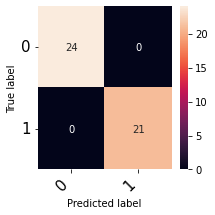

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

###Densenet

In [ ]:
model_ft = models.densenet121(pretrained=False)
#num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adamax(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 2.0035 Acc: 0.8016
val Loss: 1.4815 Acc: 0.4667

Epoch 1/19
----------
train Loss: 0.0309 Acc: 1.0000
val Loss: 0.0125 Acc: 1.0000

Epoch 2/19
----------
train Loss: 0.0124 Acc: 1.0000
val Loss: 0.0036 Acc: 1.0000

Epoch 3/19
----------
train Loss: 0.0081 Acc: 1.0000
val Loss: 0.0045 Acc: 1.0000

Epoch 4/19
----------
train Loss: 0.0056 Acc: 1.0000
val Loss: 0.0048 Acc: 1.0000

Epoch 5/19
----------
train Loss: 0.0077 Acc: 1.0000
val Loss: 0.0046 Acc: 1.0000

Epoch 6/19
----------
train Loss: 0.0074 Acc: 1.0000
val Loss: 0.0046 Acc: 1.0000

Epoch 7/19
----------
train Loss: 0.0061 Acc: 1.0000
val Loss: 0.0047 Acc: 1.0000

Epoch 8/19
----------
train Loss: 0.0082 Acc: 1.0000
val Loss: 0.0045 Acc: 1.0000

Epoch 9/19
----------
train Loss: 0.0069 Acc: 1.0000
val Loss: 0.0046 Acc: 1.0000

Epoch 10/19
----------
train Loss: 0.0094 Acc: 1.0000
val Loss: 0.0044 Acc: 1.0000

Epoch 11/19
----------
train Loss: 0.0101 Acc: 1.0000
val Loss: 0.0044 Acc: 1.0000

Epoch 12/19
----------
t

In [ ]:
torch.save(model_ft, "Cleveland_Densenet.pth")
model_ft = torch.load("/content/Cleveland_Densenet.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


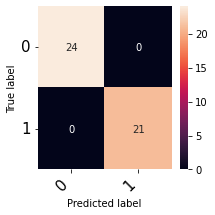

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

###Inception V1

In [ ]:
model_ft = models.googlenet(pretrained=True)
model_ft.aux_logits = False 
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


train Loss: 0.2352 Acc: 0.9008
val Loss: 0.0001 Acc: 1.0000

Epoch 1/19
----------
train Loss: 0.0050 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Epoch 2/19
----------
train Loss: 0.0012 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 3/19
----------
train Loss: 0.0006 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 4/19
----------
train Loss: 0.0006 Acc: 1.0000
val Loss: 0.0002 Acc: 1.0000

Epoch 5/19
----------
train Loss: 0.0005 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 6/19
----------
train Loss: 0.0004 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 7/19
----------
train Loss: 0.0003 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 8/19
----------
train Loss: 0.0008 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 9/19
----------
train Loss: 0.0007 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 10/19
----------
train Loss: 0.0004 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 11/19
----------
train Loss: 0.0006 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 12/19
----------
t

In [ ]:
torch.save(model_ft, "Cleveland_Inception.pth")
model_ft = torch.load("/content/Cleveland_Inception.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


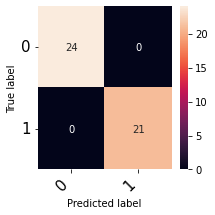

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

# 5) Diabetes 




In [ ]:
!gdown --id 1fOhli9O8PIhfIIegrJvgRQdZ52xmocqM
#For zip Dataset Folders
!unzip /content/DiabetesImageDataset.zip



/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fOhli9O8PIhfIIegrJvgRQdZ52xmocqM
To: /content/DiabetesImageDataset.zip
100% 831k/831k [00:00<00:00, 159MB/s]
Archive:  /content/DiabetesImageDataset.zip
   creating: content/DiabetesImageDataset/
   creating: content/DiabetesImageDataset/Negative/
  inflating: content/DiabetesImageDataset/Negative/327.png  
  inflating: content/DiabetesImageDataset/Negative/220.png  
  inflating: content/DiabetesImageDataset/Negative/508.png  
  inflating: content/DiabetesImageDataset/Negative/275.png  
  inflating: content/DiabetesImageDataset/Negative/283.png  
  inflating: content/DiabetesImageDataset/Negative/334.png  
  inflating: content/DiabetesImageDataset/Negative/493.png  
  inflating: content/DiabetesImageDataset/Negati

In [ ]:
import splitfolders  # or import split_folders
splitfolders.ratio("/content/content/DiabetesImageDataset", output="/content/content/DiabetesSplit", seed=1337, ratio=(.80,  .20), group_prefix=None) # default values

Copying files: 520 files [00:00, 9566.75 files/s]


In [ ]:
os.listdir("/content/content/DiabetesSplit")

['train', 'val']

## Data Loaders

In [ ]:
# Data augmentation and normalization for training
# Just normalization/content/content/HeartDiseasesdataset for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/content/DiabetesSplit'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
dataset_sizes, class_names, device

({'train': 416, 'val': 104},
 ['Negative', 'Positive'],
 device(type='cuda', index=0))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


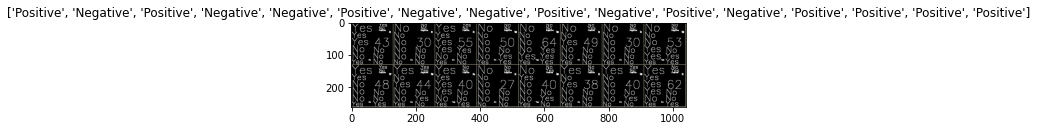

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_openml

In [ ]:
def train_simple_network_with_input_reshape(model, loss_func, train_loader, val_loader=None, score_funcs=None, 
                                            epochs=25, device="cpu", checkpoint_file=None):
    """Train simple neural networks
    
    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs. 
    val_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training
    
    Here used the method provided in lecture only added code to flatten the inputs before passing to linear model
    """
    to_track = ["epoch", "total time", "train loss"]
    if val_loader is not None:
        to_track.append("val loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if val_loader is not None:
            to_track.append("val " + eval_score )
        
    total_train_time = 0 #How long have we spent in the training loop? 
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []
    
    #SGD is Stochastic Gradient Decent.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0
        
        y_true = []
        y_pred = []

        start = time.time()
        for inputs, labels in tqdm(train_loader, desc="Train Batch", leave=False):
      
            #Move the batch to the device we are using. 
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            batch_size = inputs.shape[0]

            # PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            #flatten the input to fit in linear model
            y_hat = model(inputs) #this just computed f_Θ(x(i))#pass in a flattened view of inputs

            # Compute loss.
            loss = loss_func(y_hat, labels)

            loss.backward()# ∇_Θ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# Θ_{k+1} = Θ_k − η * ∇_Θ ℓ(y_hat, y)

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item() * inputs.size(0)
            
            #moving labels & predictions back to CPU for computing / storing predictions
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            for i in range(batch_size):
                y_true.append(labels[i])
                y_pred.append(y_hat[i,:])
        #end training epoch
        end = time.time()
        total_train_time += (end-start)
        
        results["epoch"].append( epoch )
        results["total time"].append( total_train_time )
        results["train loss"].append( running_loss )
        
        y_pred = np.asarray(y_pred)
        
        if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
            y_pred = np.argmax(y_pred, axis=1)
            
        for name, score_func in score_funcs.items():
            results["train " + name].append( score_func(y_true, y_pred) )
      
        if val_loader is None:
            pass
        else:#Lets find out validation performance as we go!
            model = model.eval() #Set the model to "evaluation" mode, b/c we don't want to make any updates!

            y_true = []
            y_pred = []
            
            running_loss = 0.0

            for inputs, labels in val_loader:
        
                #Move the batch to the device we are using. 
                inputs = inputs.to(device)
                labels = labels.to(device)

                #flatten the input to fit in linear model
                y_hat = model(inputs) #pass in a flattened view of inputs
            
                loss = loss_func(y_hat, labels)
                
                #Now we are just grabbing some information we would like to have
                running_loss += loss.item() * inputs.size(0)

                #moving labels & predictions back to CPU for computing / storing predictions
                labels = labels.detach().cpu().numpy()
                y_hat = y_hat.detach().cpu().numpy()
                for i in range(batch_size):
                    y_true.append(labels[i])
                    y_pred.append(y_hat[i,:])
                        
            results["val loss"].append( running_loss )

            y_pred = np.asarray(y_pred)

            if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
                y_pred = np.argmax(y_pred, axis=1)

            for name, score_func in score_funcs.items():
                results["val " + name].append( score_func(y_true, y_pred) )
                
        if checkpoint_file is not None:
            torch.save({
                'epoch': epoch,
                'c': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'results' : results
                }, checkpoint_file)

    return pd.DataFrame.from_dict(results)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    res_dict = {}
    epoch_loss_list = []
    epoch_acc_list = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            epoch_loss_list.append(epoch_loss)
            epoch_acc_list.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            res_dict[phase] = epoch_acc_list
            


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_loss_list, epoch_acc_list,res_dict

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

## Traning, Testing and Evaluation

## Restnet-18

In [ ]:
#Resnet Function with parameters as input


model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0005)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.1151 Acc: 0.9399
val Loss: 0.0157 Acc: 1.0000

Epoch 1/4
----------
train Loss: 0.0005 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Epoch 2/4
----------
train Loss: 0.0003 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Epoch 3/4
----------
train Loss: 0.0002 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Epoch 4/4
----------
train Loss: 0.0005 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Training complete in 0m 8s
Best val Acc: 1.000000


In [ ]:
torch.save(model_ft, "Diabetes_Resnet18.pth")
model_ft = torch.load("/content/Diabetes_Resnet18.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


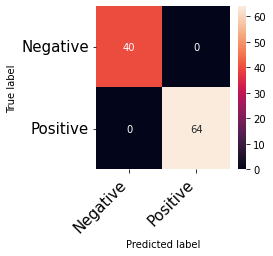

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

In [ ]:
def getConfusionMatrix(model, show_image=False):
    model.eval() #set the model to evaluation mode
    confusion_matrix=np.zeros((2,2),dtype=int) #initialize a confusion matrix
    num_images=dataloaders['val'] #size of the testset
    
    with torch.no_grad(): #disable back prop to test the model
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            #get predictions of the model
            outputs = model(inputs) 
            _, preds = torch.max(outputs, 1) 
            
            #get confusion matrix
            for j in range(inputs.size()[0]): 
                if preds[j]==1 and labels[j]==1:
                    term='TP'
                    confusion_matrix[0][0]+=1
                elif preds[j]==1 and labels[j]==0:
                    term='FP'
                    confusion_matrix[1][0]+=1
                elif preds[j]==0 and labels[j]==1:
                    term='FN'
                    confusion_matrix[0][1]+=1
                elif preds[j]==0 and labels[j]==0:
                    term='TN'
                    confusion_matrix[1][1]+=1
                #show image and its class in confusion matrix    
                if show_image:
                    print('predicted: {}'.format(class_names[preds[j]]))
                    print(term)
                    imshow(inputs.cpu().data[j])
                    print()
        #print results
        print('Confusion Matrix: ')
        print(confusion_matrix)
        print()
        print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
        print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
        print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
        print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))
        
        return confusion_matrix

## Densenet

In [ ]:
model_ft = models.densenet121(pretrained=False)
#num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adamax(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 1.1361 Acc: 0.9087
val Loss: 0.2454 Acc: 0.9423

Epoch 1/4
----------
train Loss: 0.0103 Acc: 1.0000
val Loss: 0.0049 Acc: 1.0000

Epoch 2/4
----------
train Loss: 0.0044 Acc: 1.0000
val Loss: 0.0015 Acc: 1.0000

Epoch 3/4
----------
train Loss: 0.0035 Acc: 1.0000
val Loss: 0.0014 Acc: 1.0000

Epoch 4/4
----------
train Loss: 0.0063 Acc: 1.0000
val Loss: 0.0015 Acc: 1.0000

Training complete in 0m 21s
Best val Acc: 1.000000


In [ ]:
torch.save(model_ft, "Diabetes_Densenet.pth")
model_ft = torch.load("/content/Diabetes_Densenet.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


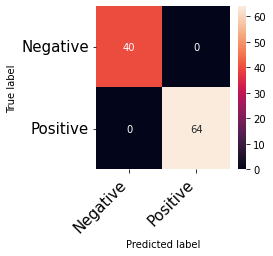

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

In [ ]:
def getConfusionMatrix(model, show_image=False):
    model.eval() #set the model to evaluation mode
    confusion_matrix=np.zeros((2,2),dtype=int) #initialize a confusion matrix
    num_images=dataloaders['val'] #size of the testset
    
    with torch.no_grad(): #disable back prop to test the model
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            #get predictions of the model
            outputs = model(inputs) 
            _, preds = torch.max(outputs, 1) 
            
            #get confusion matrix
            for j in range(inputs.size()[0]): 
                if preds[j]==1 and labels[j]==1:
                    term='TP'
                    confusion_matrix[0][0]+=1
                elif preds[j]==1 and labels[j]==0:
                    term='FP'
                    confusion_matrix[1][0]+=1
                elif preds[j]==0 and labels[j]==1:
                    term='FN'
                    confusion_matrix[0][1]+=1
                elif preds[j]==0 and labels[j]==0:
                    term='TN'
                    confusion_matrix[1][1]+=1
                #show image and its class in confusion matrix    
                if show_image:
                    print('predicted: {}'.format(class_names[preds[j]]))
                    print(term)
                    imshow(inputs.cpu().data[j])
                    print()
        #print results
        print('Confusion Matrix: ')
        print(confusion_matrix)
        print()
        print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
        print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
        print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
        print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))
        
        return confusion_matrix

## Inception V1

In [ ]:
model_ft = models.googlenet(pretrained=True)
model_ft.aux_logits = False 
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 0/14
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


train Loss: 0.1528 Acc: 0.9303
val Loss: 0.0017 Acc: 1.0000

Epoch 1/14
----------
train Loss: 0.0069 Acc: 1.0000
val Loss: 0.0003 Acc: 1.0000

Epoch 2/14
----------
train Loss: 0.0807 Acc: 0.9736
val Loss: 3.0533 Acc: 0.3846

Epoch 3/14
----------
train Loss: 0.0034 Acc: 1.0000
val Loss: 0.0004 Acc: 1.0000

Epoch 4/14
----------
train Loss: 0.0011 Acc: 1.0000
val Loss: 0.0002 Acc: 1.0000

Epoch 5/14
----------
train Loss: 0.0024 Acc: 1.0000
val Loss: 0.0002 Acc: 1.0000

Epoch 6/14
----------
train Loss: 0.0023 Acc: 1.0000
val Loss: 0.0002 Acc: 1.0000

Epoch 7/14
----------
train Loss: 0.0006 Acc: 1.0000
val Loss: 0.0002 Acc: 1.0000

Epoch 8/14
----------
train Loss: 0.0036 Acc: 1.0000
val Loss: 0.0003 Acc: 1.0000

Epoch 9/14
----------
train Loss: 0.0006 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 10/14
----------
train Loss: 0.0019 Acc: 1.0000
val Loss: 0.0002 Acc: 1.0000

Epoch 11/14
----------
train Loss: 0.0015 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 12/14
----------
t

In [ ]:
torch.save(model_ft, "Diabetes_Inception.pth")
model_ft = torch.load("/content/Diabetes_Inception.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


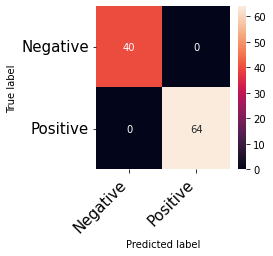

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

# 6) Adult Dataset

In [ ]:
!gdown --id 1XyLaAX8veW-Y27tBm_d9PVGbo2yF6dTj
#For zip Dataset Folders
!unzip /content/AdultImageDataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/AdultImageDataset/ <=50K/38839.png  
  inflating: content/AdultImageDataset/ <=50K/43844.png  
  inflating: content/AdultImageDataset/ <=50K/37850.png  
  inflating: content/AdultImageDataset/ <=50K/33529.png  
  inflating: content/AdultImageDataset/ <=50K/36402.png  
  inflating: content/AdultImageDataset/ <=50K/39263.png  
  inflating: content/AdultImageDataset/ <=50K/33283.png  
  inflating: content/AdultImageDataset/ <=50K/45716.png  
  inflating: content/AdultImageDataset/ <=50K/46910.png  
  inflating: content/AdultImageDataset/ <=50K/48572.png  
  inflating: content/AdultImageDataset/ <=50K/40028.png  
  inflating: content/AdultImageDataset/ <=50K/40723.png  
  inflating: content/AdultImageDataset/ <=50K/45354.png  
  inflating: content/AdultImageDataset/ <=50K/35105.png  
  inflating: content/AdultImageDataset/ <=50K/40178.png  
  inflating: content/AdultImageDataset/ <=50K/43547.png  
  inflating: content/

In [ ]:
import splitfolders  # or import split_folders
splitfolders.ratio("/content/content/AdultImageDataset", output="/content/content/AdultSplit", seed=1337, ratio=(.90,  .10), group_prefix=None) # default values

Copying files: 48842 files [00:09, 5363.82 files/s]


In [ ]:
os.listdir("/content/content/AdultSplit")

['train', 'val']

##DataLoaders

In [ ]:
# Data augmentation and normalization for training
# Just normalization/content/content/HeartDiseasesdataset for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/content/AdultSplit/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
dataset_sizes, class_names, device

({'train': 43957, 'val': 4885},
 [' <=50K', ' >50K'],
 device(type='cuda', index=0))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


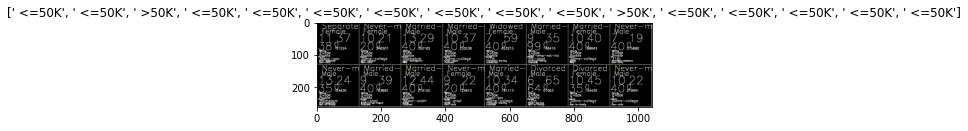

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_openml

In [ ]:
def train_simple_network_with_input_reshape(model, loss_func, train_loader, val_loader=None, score_funcs=None, 
                                            epochs=25, device="cpu", checkpoint_file=None):
    """Train simple neural networks
    
    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs. 
    val_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training
    
    Here used the method provided in lecture only added code to flatten the inputs before passing to linear model
    """
    to_track = ["epoch", "total time", "train loss"]
    if val_loader is not None:
        to_track.append("val loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if val_loader is not None:
            to_track.append("val " + eval_score )
        
    total_train_time = 0 #How long have we spent in the training loop? 
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []
    
    #SGD is Stochastic Gradient Decent.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0
        
        y_true = []
        y_pred = []

        start = time.time()
        for inputs, labels in tqdm(train_loader, desc="Train Batch", leave=False):
      
            #Move the batch to the device we are using. 
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            batch_size = inputs.shape[0]

            # PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            #flatten the input to fit in linear model
            y_hat = model(inputs) #this just computed f_Θ(x(i))#pass in a flattened view of inputs

            # Compute loss.
            loss = loss_func(y_hat, labels)

            loss.backward()# ∇_Θ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# Θ_{k+1} = Θ_k − η * ∇_Θ ℓ(y_hat, y)

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item() * inputs.size(0)
            
            #moving labels & predictions back to CPU for computing / storing predictions
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            for i in range(batch_size):
                y_true.append(labels[i])
                y_pred.append(y_hat[i,:])
        #end training epoch
        end = time.time()
        total_train_time += (end-start)
        
        results["epoch"].append( epoch )
        results["total time"].append( total_train_time )
        results["train loss"].append( running_loss )
        
        y_pred = np.asarray(y_pred)
        
        if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
            y_pred = np.argmax(y_pred, axis=1)
            
        for name, score_func in score_funcs.items():
            results["train " + name].append( score_func(y_true, y_pred) )
      
        if val_loader is None:
            pass
        else:#Lets find out validation performance as we go!
            model = model.eval() #Set the model to "evaluation" mode, b/c we don't want to make any updates!

            y_true = []
            y_pred = []
            
            running_loss = 0.0

            for inputs, labels in val_loader:
        
                #Move the batch to the device we are using. 
                inputs = inputs.to(device)
                labels = labels.to(device)

                #flatten the input to fit in linear model
                y_hat = model(inputs) #pass in a flattened view of inputs
            
                loss = loss_func(y_hat, labels)
                
                #Now we are just grabbing some information we would like to have
                running_loss += loss.item() * inputs.size(0)

                #moving labels & predictions back to CPU for computing / storing predictions
                labels = labels.detach().cpu().numpy()
                y_hat = y_hat.detach().cpu().numpy()
                for i in range(batch_size):
                    y_true.append(labels[i])
                    y_pred.append(y_hat[i,:])
                        
            results["val loss"].append( running_loss )

            y_pred = np.asarray(y_pred)

            if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
                y_pred = np.argmax(y_pred, axis=1)

            for name, score_func in score_funcs.items():
                results["val " + name].append( score_func(y_true, y_pred) )
                
        if checkpoint_file is not None:
            torch.save({
                'epoch': epoch,
                'c': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'results' : results
                }, checkpoint_file)

    return pd.DataFrame.from_dict(results)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    res_dict = {}
    epoch_loss_list = []
    epoch_acc_list = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            epoch_loss_list.append(epoch_loss)
            epoch_acc_list.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            res_dict[phase] = epoch_acc_list
            


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_loss_list, epoch_acc_list,res_dict

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

##Resnet-18

In [ ]:
#Resnet Function with parameters as input


model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
#optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0005)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.0392 Acc: 0.9896
val Loss: 0.0010 Acc: 1.0000

Epoch 1/4
----------
train Loss: 0.0022 Acc: 0.9999
val Loss: 0.0004 Acc: 1.0000

Epoch 2/4
----------
train Loss: 0.0011 Acc: 1.0000
val Loss: 0.0003 Acc: 1.0000

Epoch 3/4
----------
train Loss: 0.0008 Acc: 1.0000
val Loss: 0.0001 Acc: 1.0000

Epoch 4/4
----------
train Loss: 0.0009 Acc: 1.0000
val Loss: 0.0002 Acc: 1.0000

Training complete in 7m 32s
Best val Acc: 1.000000


In [ ]:
torch.save(model_ft, "Adult_Resnet18.pth")
model_ft = torch.load("/content/Adult_Resnet18.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


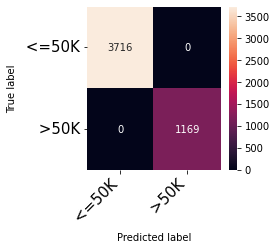

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

In [ ]:
def getConfusionMatrix(model, show_image=False):
    model.eval() #set the model to evaluation mode
    confusion_matrix=np.zeros((2,2),dtype=int) #initialize a confusion matrix
    num_images=dataloaders['val'] #size of the testset
    
    with torch.no_grad(): #disable back prop to test the model
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            #get predictions of the model
            outputs = model(inputs) 
            _, preds = torch.max(outputs, 1) 
            
            #get confusion matrix
            for j in range(inputs.size()[0]): 
                if preds[j]==1 and labels[j]==1:
                    term='TP'
                    confusion_matrix[0][0]+=1
                elif preds[j]==1 and labels[j]==0:
                    term='FP'
                    confusion_matrix[1][0]+=1
                elif preds[j]==0 and labels[j]==1:
                    term='FN'
                    confusion_matrix[0][1]+=1
                elif preds[j]==0 and labels[j]==0:
                    term='TN'
                    confusion_matrix[1][1]+=1
                #show image and its class in confusion matrix    
                if show_image:
                    print('predicted: {}'.format(class_names[preds[j]]))
                    print(term)
                    imshow(inputs.cpu().data[j])
                    print()
        #print results
        print('Confusion Matrix: ')
        print(confusion_matrix)
        print()
        print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
        print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
        print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
        print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))
        
        return confusion_matrix

##Densenet

In [ ]:
model_ft = models.densenet121(pretrained=False)
#num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adamax(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.0120 Acc: 0.9992
val Loss: 0.0000 Acc: 1.0000

Epoch 1/4
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Epoch 2/4
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Epoch 3/4
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Epoch 4/4
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Training complete in 29m 24s
Best val Acc: 1.000000


In [ ]:
torch.save(model_ft, "Adult_Densenet.pth")
model_ft = torch.load("/content/Adult_Densenet.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


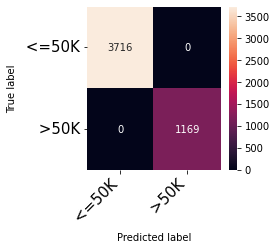

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

In [ ]:
def getConfusionMatrix(model, show_image=False):
    model.eval() #set the model to evaluation mode
    confusion_matrix=np.zeros((2,2),dtype=int) #initialize a confusion matrix
    num_images=dataloaders['val'] #size of the testset
    
    with torch.no_grad(): #disable back prop to test the model
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            #get predictions of the model
            outputs = model(inputs) 
            _, preds = torch.max(outputs, 1) 
            
            #get confusion matrix
            for j in range(inputs.size()[0]): 
                if preds[j]==1 and labels[j]==1:
                    term='TP'
                    confusion_matrix[0][0]+=1
                elif preds[j]==1 and labels[j]==0:
                    term='FP'
                    confusion_matrix[1][0]+=1
                elif preds[j]==0 and labels[j]==1:
                    term='FN'
                    confusion_matrix[0][1]+=1
                elif preds[j]==0 and labels[j]==0:
                    term='TN'
                    confusion_matrix[1][1]+=1
                #show image and its class in confusion matrix    
                if show_image:
                    print('predicted: {}'.format(class_names[preds[j]]))
                    print(term)
                    imshow(inputs.cpu().data[j])
                    print()
        #print results
        print('Confusion Matrix: ')
        print(confusion_matrix)
        print()
        print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
        print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
        print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
        print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))
        
        return confusion_matrix

##Inception V1

In [ ]:
model_ft = models.googlenet(pretrained=True)
model_ft.aux_logits = False 
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


train Loss: 0.0027 Acc: 0.9992
val Loss: 0.0000 Acc: 1.0000

Epoch 1/4
----------
train Loss: 0.0029 Acc: 0.9993
val Loss: 0.0000 Acc: 1.0000

Epoch 2/4
----------
train Loss: 0.0001 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Epoch 3/4
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Epoch 4/4
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 0.0000 Acc: 1.0000

Training complete in 12m 36s
Best val Acc: 1.000000


In [ ]:
torch.save(model_ft, "Adult_Inception.pth")
model_ft = torch.load("/content/Adult_Inception.pth")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Sensitivity:  tensor(100.)
Specificity:  tensor(100.)
PPV:  tensor(100.)
NPV:  tensor(100.)


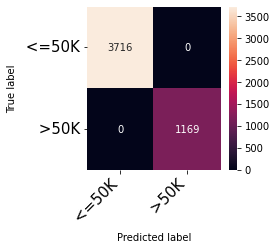

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

#print(confusion_matrix)

#print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(3,3))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))